군집분석(Clustering)이란, 유사한 속성을 갖는 객체들을 묶어 전체 객체들을 몇 개의 그룹 또는 군집(Cluster)으로 나누는 것으로, 대표적인 알고리즘으로는 아래와 같은 것들이 있다.
* K-Means
* Hierarchical Clustering
* Gaussian Mixture Model
* DB-Scan

# K-Means

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
np.random.seed(9876)
G0 = np.random.multivariate_normal([1,1], np.eye(2), 100)
G1 = np.random.multivariate_normal([3,5], np.eye(2), 100)
G2 = np.random.multivariate_normal([9,9], np.eye(2), 100)

In [3]:
X = np.vstack([G0, G1, G2])
x = np.asmatrix(X)
print("생성된 데이터 수 : ", X.shape[0])

생성된 데이터 수 :  300


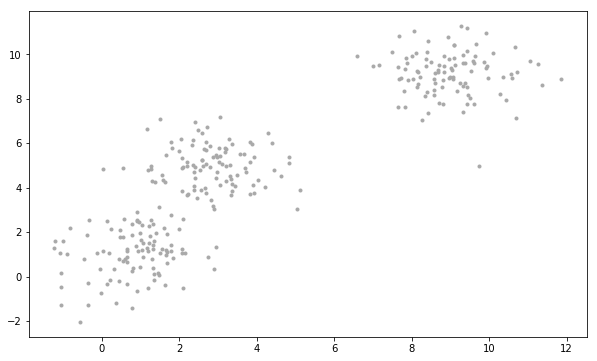

In [76]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:,0], X[:,1], color = 'darkgrey', marker = '.')
plt.show()

In [5]:
k = 3
m = X.shape[0]

np.random.seed(9876)
mu = X[np.random.randint(0, 300, k),:]
print("랜덤하게 생성한 중심 좌표 : \n", mu)

랜덤하게 생성한 중심 좌표 : 
 [[0.32783176 0.35479412]
 [0.5795835  2.61132003]
 [0.64289162 1.13618649]]


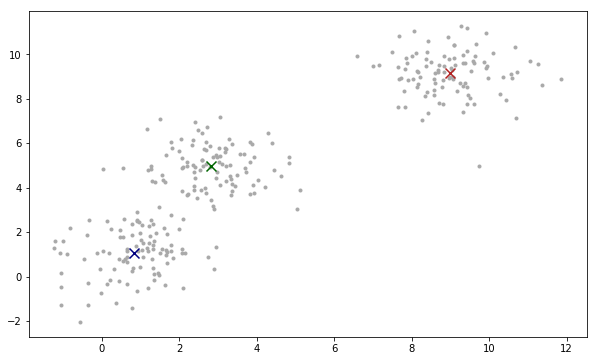

In [75]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], color = 'darkgrey', marker = '.')
plt.scatter(mu[0,0], mu[0,1], s = 100,  color = 'navy', marker = 'x')
plt.scatter(mu[1,0], mu[1,1], s = 100,  color = 'firebrick', marker = 'x')
plt.scatter(mu[2,0], mu[2,1], s = 100,  color = 'darkgreen', marker = 'x')
plt.show()

In [40]:
y = np.empty([m, 1])

mu_0 = mu[0, :]
mu_1 = mu[1, :]
mu_2 = mu[2, :]

for n_iter in range(500) :
    for i in range(m) :
        d0 = np.linalg.norm(X[i,:] - mu[0,:], 2)
        d1 = np.linalg.norm(X[i,:] - mu[1,:], 2)
        d2 = np.linalg.norm(X[i,:] - mu[2,:], 2)

        y[i] = np.argmin([d0, d1, d2])

    
    pre_mu = mu.copy()
    err = 0
    for i in range(k) :
        mu[i,:] = np.mean(X[np.where(y == i)[0]], axis = 0)
        err += np.linalg.norm(pre_mu[i,:] - mu[i,:], 2)
    
    
    mu_0 = np.vstack([mu_0, mu[0, :]])
    mu_1 = np.vstack([mu_1, mu[1, :]])
    mu_2 = np.vstack([mu_2, mu[2, :]])
    
    if err < 1e-10 :
        print("Iteration : ", n_iter)
        break

Iteration :  6


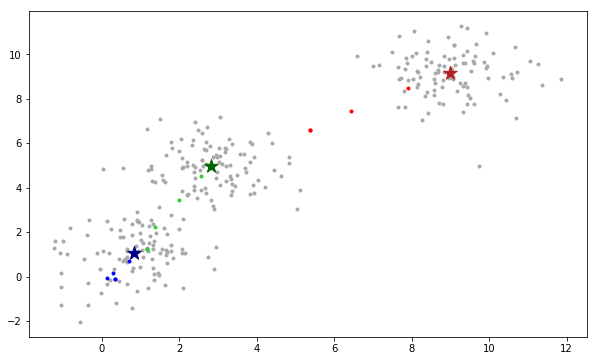

In [72]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], color = 'darkgrey', marker = '.')
plt.scatter(mu_0[:7,0], mu_0[:7,1],  color = 'blue', marker = '.')
plt.scatter(mu_0[7,0], mu_0[7,1], s = 200,  color = 'navy', marker = '*')
plt.scatter(mu_1[:7,0], mu_1[:7,1],  color = 'red', marker = '.')
plt.scatter(mu_1[7,0], mu_1[7,1], s = 200,  color = 'firebrick', marker = '*')
plt.scatter(mu_2[:7,0], mu_2[:7,1],  color = 'limegreen', marker = '.')
plt.scatter(mu_2[7,0], mu_2[7,1], s = 200,  color = 'darkgreen', marker = '*')
plt.show()

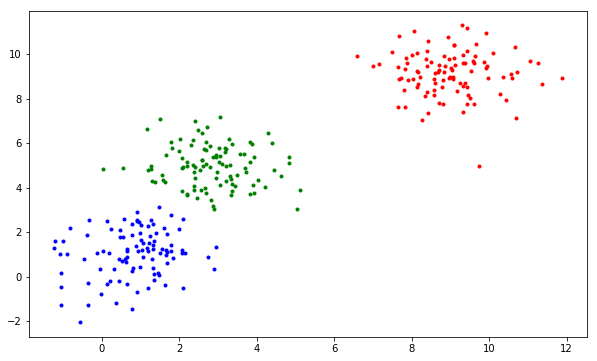

In [69]:
X0 = X[np.where(y==0)[0]]
X1 = X[np.where(y==1)[0]]
X2 = X[np.where(y==2)[0]]

plt.figure(figsize=(10,6))
plt.plot(X0[:,0], X0[:,1], 'b.')
plt.plot(X1[:,0], X1[:,1], 'r.')
plt.plot(X2[:,0], X2[:,1], 'g.')
plt.show()